# 🧪 Michaelis-Menten 효소 반응 시뮬레이터

본 프로젝트는 약리학에서 중요한 **Michaelis-Menten kinetics**를 파이썬으로 구현하고,  
저해제에 따라 반응 속도가 어떻게 변하는지를 **시각화 및 슬라이더 인터페이스**로 보여줍니다.

## 📌 기본 이론

- 반응 속도 공식:
  \[
  V = \frac{V_{\text{max}} \cdot [S]}{K_m + [S]}
  \]
- Vmax: 효소가 포화되었을 때의 최대 반응 속도  
- Km: 반응 속도가 Vmax의 50%가 되는 기질 농도 → **affinity**와 역비례 관계

---

## 📈 Michaelis-Menten 기본 곡선

- 기질 농도 [S]에 따라 반응 속도가 증가하다가, Vmax에 수렴합니다.
- Km 위치에서는 반응 속도가 정확히 Vmax의 절반입니다.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

Vmax = 1.5 #μmol/min
Km = 0.5 #mM
S_values = np.linspace(0, 5, 100) #농도범위 [0,5]mM
V_values = michaelis_menten(S_values, Vmax, Km)

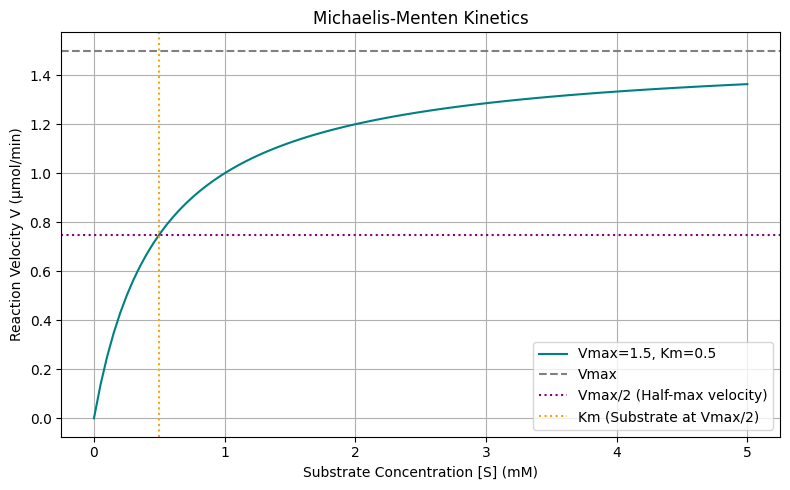

In [6]:
plt.figure(figsize=(8,5)) #그래프 가로8인치/세로 5인치
plt.plot(S_values, V_values, label=f'Vmax={Vmax}, Km={Km}', color = 'teal') #범례(label)
plt.axhline(y=Vmax, color='gray', linestyle = '--', label = "Vmax") #Vmax에 수평선
plt.axhline(y=Vmax/2, color = 'purple', linestyle = ':', label = "Vmax/2 (Half-max velocity)")
plt.axvline(x=Km, color='orange', linestyle=':', label = "Km (Substrate at Vmax/2)")

plt.title("Michaelis-Menten Kinetics")
plt.xlabel("Substrate Concentration [S] (mM)")
plt.ylabel("Reaction Velocity V (μmol/min)")
plt.legend() #앞서 설정한 범례 label을 화면에 표시
plt.grid(True)
plt.tight_layout() #라벨이나 범례, 제목 등이 겹치지 않게, 자동으로 레이아웃을 조정해주는 함수
plt.show()

## 🧪 경쟁적 저해제 시뮬레이션

- Km 값이 증가하지만 Vmax는 그대로 유지됩니다.
- 기질 농도가 높아지면 저해 효과가 상쇄됩니다.

In [7]:
Km_competitive = 1.5 #경쟁적 저해체로 Km 증가 = affinity는 감소

#두 조건에서 반응 속도 계산
V_normal = michaelis_menten(S_values, Vmax, Km)
V_inhibited = michaelis_menten(S_values, Vmax, Km_competitive)

In [8]:
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 때문에..

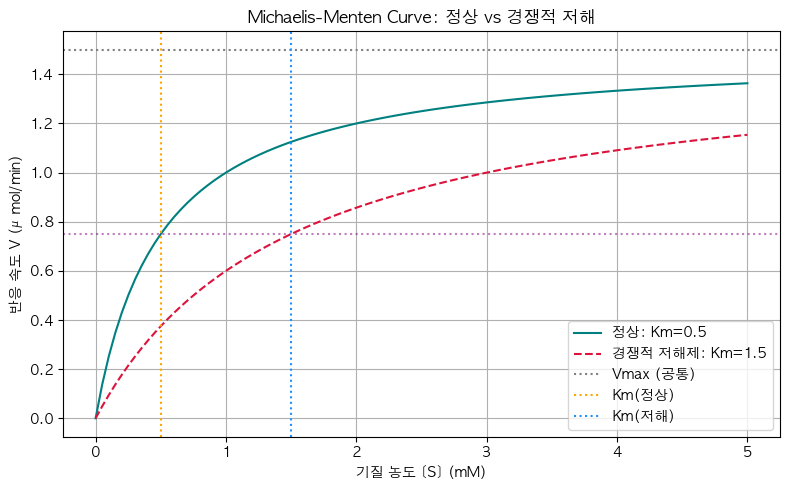

In [9]:
plt.figure(figsize=(8,5))
plt.plot(S_values, V_normal, label = f'정상: Km={Km}', color='teal')
plt.plot(S_values, V_inhibited, label=f'경쟁적 저해제: Km={Km_competitive}', color = 'crimson', linestyle='--')
plt.axhline(y=Vmax, color='gray', linestyle=':', label='Vmax (공통)')
plt.axhline(y=Vmax/2, color='purple', linestyle=':', alpha=0.5) #알파=투명도 0이 투명

plt.axvline(x=Km, color = 'orange', linestyle=':', label='Km(정상)')
plt.axvline(x=Km_competitive, color='dodgerblue', linestyle=":", label= 'Km(저해)')


plt.title("Michaelis-Menten Curve: 정상 vs 경쟁적 저해")
plt.xlabel("기질 농도 [S] (mM)")
plt.ylabel("반응 속도 V (μmol/min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 🧪 비경쟁적 저해제 시뮬레이션

- Vmax가 낮아지지만 Km은 변하지 않습니다.
- 저해제가 있든 없든 **기질 농도 증가로 극복이 불가능**합니다.

In [10]:
Vmax_normal = 1.5
Vmax_inhibited = 0.8
Km=0.5 #비경쟁적 저해제는 Km 그대로

V_normal = michaelis_menten(S_values, Vmax_normal, Km)
V_inhibited = michaelis_menten(S_values, Vmax_inhibited, Km)

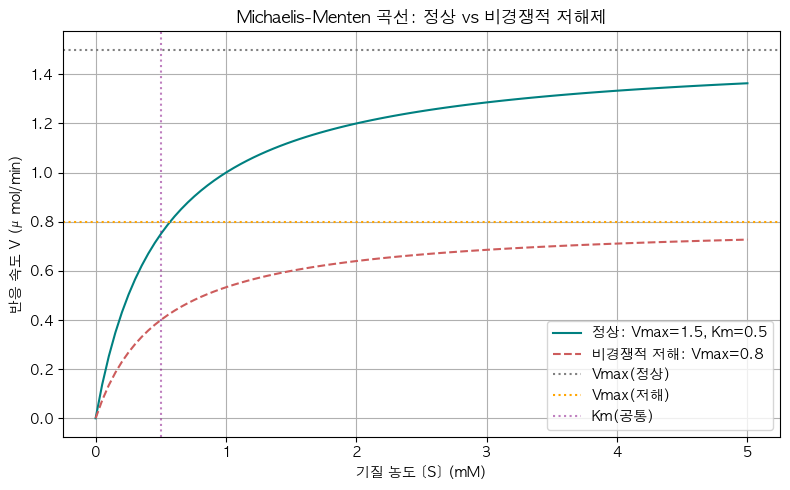

In [11]:
# 한글 설정 (macOS 기준)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(8,5))
plt.plot(S_values, V_normal, label=f'정상: Vmax={Vmax_normal}, Km={Km}', color ='teal')
plt.plot(S_values, V_inhibited, label=f'비경쟁적 저해: Vmax={Vmax_inhibited}', color='indianred', linestyle='--')
plt.axhline(y=Vmax_normal, color='gray', linestyle=":", label='Vmax(정상)')
plt.axhline(y=Vmax_inhibited, color='orange', linestyle=':', label="Vmax(저해)")
plt.axvline(x=Km, color='purple', linestyle=':', alpha=0.5, label="Km(공통)")

plt.title("Michaelis-Menten 곡선: 정상 vs 비경쟁적 저해제")
plt.xlabel("기질 농도 [S] (mM)")
plt.ylabel("반응 속도 V (μmol/min)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🎮 슬라이더 기반 시뮬레이션

- 저해제 종류를 선택하고, 저해 강도(Km 또는 Vmax)를 조절하여  
  실시간으로 곡선 변화를 확인할 수 있습니다.

In [12]:
from ipywidgets import interact, widgets

#폰트 설정
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

In [13]:
# Michaelis-Menten 식
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

In [14]:
def simulate_inhibition_control(inhibitor_type, adjustable_val): #val 붙은건 사용자가 조절할 값
    S = np.linspace(0, 5, 100)

    # 정상 조건
    normal_Vmax = 1.5
    normal_Km = 0.5
    V_normal = michaelis_menten(S, normal_Vmax, normal_Km)

    #저해제의 유형에 따라 파라미터 조정
    if inhibitor_type == '경쟁적 저해제':
        Km = adjustable_val #Km만 증가
        Vmax = normal_Vmax #고정
    elif inhibitor_type == '비경쟁적 저해제':
        Km = normal_Km
        Vmax = adjustable_val
    
    V_inhibited = michaelis_menten(S, Vmax, Km)

    #그래프 그리기
    plt.figure(figsize=(8, 5))

    # 정상 곡선
    plt.plot(S, V_normal, label=f"정상 (Vmax={normal_Vmax}, Km={normal_Km})", color='gray', linestyle='--')

    # 저해제 적용 곡선
    plt.plot(S, V_inhibited, label=f"{inhibitor_type} 적용 (Vmax={Vmax:.2f}, Km={Km:.2f})", color='teal')

    # 기준선
    plt.axvline(Km, color='orange', linestyle=':', alpha=0.7, label="Km 위치")
    plt.axhline(Vmax, color='purple', linestyle=':', alpha=0.7, label="Vmax 위치")

    plt.title("Michaelis-Menten 곡선 비교")
    plt.xlabel("기질 농도 [S] (mM)")
    plt.ylabel("반응 속도 V (μmol/min)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



In [15]:
#슬라이더 자동 전환 함수
def make_ui(inhibitor_type):
    if inhibitor_type == '경쟁적 저해제':
        return widgets.interactive(
            simulate_inhibition_control,
            inhibitor_type = widgets.fixed('경쟁적 저해제'),
            adjustable_val=widgets.FloatSlider(value=0.5, min=0.1, max=3.0, step=0.1, description="Km")
        )
    elif inhibitor_type == '비경쟁적 저해제':
        return widgets.interactive(
            simulate_inhibition_control,
            inhibitor_type = widgets.fixed('비경쟁적 저해제'),
            adjustable_val=widgets.FloatSlider(value=1.5, min=0.1, max=3.0, step=0.1, description="Vmax")
        )

In [ ]:
# 드롭다운 → 인터페이스 연결
widgets.interact(make_ui, inhibitor_type=widgets.Dropdown(
    options=["경쟁적 저해제", "비경쟁적 저해제"],
    description="저해제 종류:"
))

interactive(children=(Dropdown(description='저해제 종류:', options=('경쟁적 저해제', '비경쟁적 저해제'), value='경쟁적 저해제'), Outpu…

<function __main__.make_ui(inhibitor_type)>


## ✅ 사용 기술 스택

- Python (NumPy, Matplotlib)
- Jupyter Notebook
- ipywidgets (슬라이더 인터페이스)